<a href="https://colab.research.google.com/github/aalling93/cosc304-assignment5/blob/master/Kopi_af_Check_activition_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity function
The following codelab notebook is used to illustrate the different acitvty functions.

For information on how to make the models, create layer, change hyper parameters ect, see the main document: A novel study of CNN.


## Initializaiton

In [1]:

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
#To visualize it..
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

print(tf.__version__)


# FUNCTIONS
import numpy as np
import time
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from PIL import Image as pil_image
from tensorflow.keras.preprocessing.image import save_img
from tensorflow.keras import layers
from tensorflow.keras.applications import vgg16
from tensorflow.keras import backend as K

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(12,12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

    

TensorFlow 2.x selected.
2.0.0


Using TensorFlow backend.


### Getting and preparing dataset

#### fetching


In [2]:
#loading the set directly from keras bucket.
cifar100 = tf.keras.datasets.cifar100
#defining training(test) data and its labels. The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Making the set smaller since its for illustrative purposes.
x_train = x_train[0:5000]
y_train = y_train[0:5000]
x_test = x_test[0:1000]
y_test = y_test[0:1000]
#see a bit of stats..
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# The data is already labbeled.. Othervise, define into classes like:
# class_names = ['dolphin', 'dog', 'cat', 'mouse', 'ape',  '...']

#


170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (5000, 32, 32, 3)
5000 train samples
1000 test samples


#### parameters


In [0]:
#Convert class vectors to binary class matrices.
num_classes = 10 #from 100 to 10 classes....# in the CIFAR10 theres 10 classes extracted from the CIFAR100 dataset..
y_test_scivit = np.squeeze(np.copy(y_test)) #used for confusin matrix in scilearn lib. AFTER predictions are made...
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# ------ Hyper parameters to control the size of the output of CNN layer. Depth, stride and zero padding..
#filter size
filter_size = 3
padding  = (filter_size-1)/2
filter_size = (filter_size,filter_size)
# Stride controls the "overlap" between neighoboring convolutions. For sattellite image, a strid of e.g. 10 is smart . This reduces the dimension.. If stride=1, we move filter one pixel at a time. 
stride = 3 
#depth is number of neurons(filters) in the given layer connected to the input (either original img or feature img). 
depth = 5
#number of filters used in the first Convolutional layer
filters_first_layer = 20
# Epoch is the number each batch is trained
epoch=20
#Using batch learning as in the theory
batch_size = 20
#num_predictions = 20

#### Making model

Train on 5000 samples, validate on 1000 samples
Epoch 1/20
5000/5000 [==============================] - 11s 2ms/sample - loss: 3.1220 - accuracy: 0.1550 - val_loss: 2.3143 - val_accuracy: 0.1620
Epoch 2/20
5000/5000 [==============================] - 10s 2ms/sample - loss: 2.5307 - accuracy: 0.2208 - val_loss: 2.1164 - val_accuracy: 0.2560
Epoch 3/20
5000/5000 [==============================] - 10s 2ms/sample - loss: 2.2835 - accuracy: 0.2654 - val_loss: 2.0315 - val_accuracy: 0.2900
Epoch 4/20
5000/5000 [==============================] - 10s 2ms/sample - loss: 2.1812 - accuracy: 0.2826 - val_loss: 1.9316 - val_accuracy: 0.3150
Epoch 5/20
5000/5000 [==============================] - 10s 2ms/sample - loss: 2.0925 - accuracy: 0.3102 - val_loss: 1.9191 - val_accuracy: 0.3160
Epoch 6/20
5000/5000 [==============================] - 10s 2ms/sample - loss: 2.0108 - accuracy: 0.3324 - val_loss: 1.8881 - val_accuracy: 0.3270
Epoch 7/20
5000/5000 [==============================] - 10s 2ms/sample

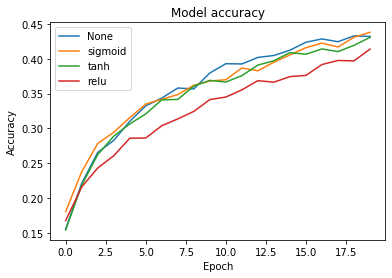

In [4]:
#Scaling the data from [0:255] to [0:1]..
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
x_train /= 255
x_test /= 255

#------------------------ BUILING THE MODEL FOR DIFFERENT ACTIVAATIONS ------------------------------------
for activation in [None, 'sigmoid', 'tanh', 'relu']:
  # Initializing the model using Sequntial(), The Sequential model is a linear stack of layers. https://keras.io/getting-started/sequential-model-guide/
  model = Sequential()
  model.add(Conv2D(filters_first_layer, filter_size, padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.1))
  model.add(Conv2D(filters_first_layer, filter_size))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.1))
  model.add(Conv2D(filters_first_layer*2, filter_size, padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.1))
  model.add(Flatten())
  model.add(Dense(10, kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001),activity_regularizer=regularizers.l2(0.001),activation='softmax',use_bias=False))


  optimizer = keras.optimizers.SGD(lr=0.0005)
  model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epoch, validation_data=(x_test, y_test),shuffle=True)
  plt.plot(history.history['accuracy'])  

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')










